# Import Libraries

In [39]:
import utility_func as util
import importlib
importlib.reload(util)

<module 'utility_func' from 'D:\\GitUpload\\CMT-GSC-AI\\utility_func.py'>

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [3]:
curr_dir = (util.os.getcwd()).replace('\\', '/')
data_path = (util.os.path.join(curr_dir, 'Data')).replace('\\', '/')

In [4]:
str_sed_data = util.pd.read_csv(data_path + '/Kodangal dataset/proc_elem_Kodangal_gcM.csv')

In [5]:
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,hf,ta,w,u,toposheet,in_,f,te,tl,hg
0,274643,276298,56G04/014/SS/18-19,77.25,17.00904,44.750,10.930,3.312,0.560,6.20,...,5.746369,0.862203,0.991997,1.811020,56G04,0.052741,322.0,0.101815,0.293517,17.0
1,274657,276312,56G04/028/SS/18-19,77.25,17.02711,45.129,10.930,3.748,0.580,6.20,...,7.857656,0.958655,0.943758,2.203597,56G04,0.048799,336.0,0.072979,0.300787,8.0
2,274671,276326,56G04/042/SS/18-19,77.25,17.04518,58.283,12.534,7.768,1.321,2.91,...,8.728652,1.428838,1.682294,2.711943,56G04,0.126064,205.0,0.121959,0.481961,12.0
3,274685,276340,56G04/056/SS/18-19,77.25,17.06325,61.180,11.670,8.340,1.420,2.43,...,9.365000,1.542800,1.803219,2.982200,56G04,0.084033,230.0,0.071592,0.427797,10.0
4,274699,276354,56G04/070/SS/18-19,77.25,17.08132,60.300,11.470,8.270,1.430,1.99,...,10.693400,1.467300,1.451395,3.249200,56G04,0.083470,300.0,0.067475,0.447018,7.0


# EDA

In [6]:
str_elem = util.elem_list(str_sed_data)

In [7]:
len(str_elem)

61

In [8]:
elem_df = str_sed_data[str_elem]
elem_df.head()

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,lu,hf,ta,w,u,in_,f,te,tl,hg
0,44.750,10.930,3.312,0.560,6.20,1.573,0.073,0.152,1.258,0.129,...,0.335326,5.746369,0.862203,0.991997,1.811020,0.052741,322.0,0.101815,0.293517,17.0
1,45.129,10.930,3.748,0.580,6.20,1.480,0.109,0.167,1.207,0.080,...,0.391008,7.857656,0.958655,0.943758,2.203597,0.048799,336.0,0.072979,0.300787,8.0
2,58.283,12.534,7.768,1.321,2.91,1.912,0.192,0.050,0.800,0.061,...,0.508111,8.728652,1.428838,1.682294,2.711943,0.126064,205.0,0.121959,0.481961,12.0
3,61.180,11.670,8.340,1.420,2.43,1.710,0.180,0.250,0.660,0.080,...,0.531900,9.365000,1.542800,1.803219,2.982200,0.084033,230.0,0.071592,0.427797,10.0
4,60.300,11.470,8.270,1.430,1.99,1.610,0.170,0.230,0.580,0.061,...,0.524000,10.693400,1.467300,1.451395,3.249200,0.083470,300.0,0.067475,0.447018,7.0


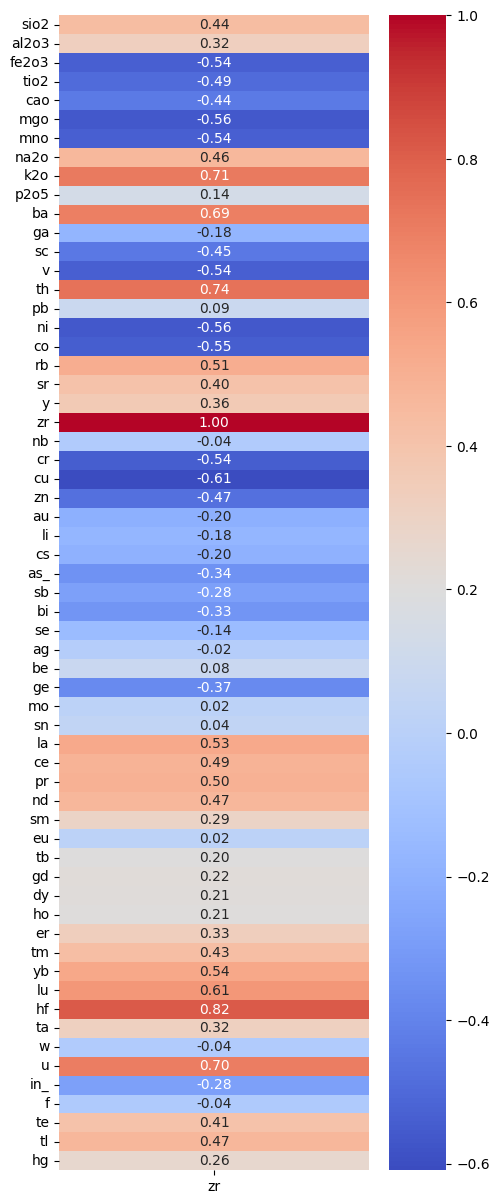

In [9]:
corr_df = elem_df.corr()
target_corr = corr_df[['zr']]

util.plt.figure(figsize=(5,15))
util.sns.heatmap(target_corr, 
                 annot=True, 
                 fmt=".2f", 
                 cmap='coolwarm')
util.plt.show()

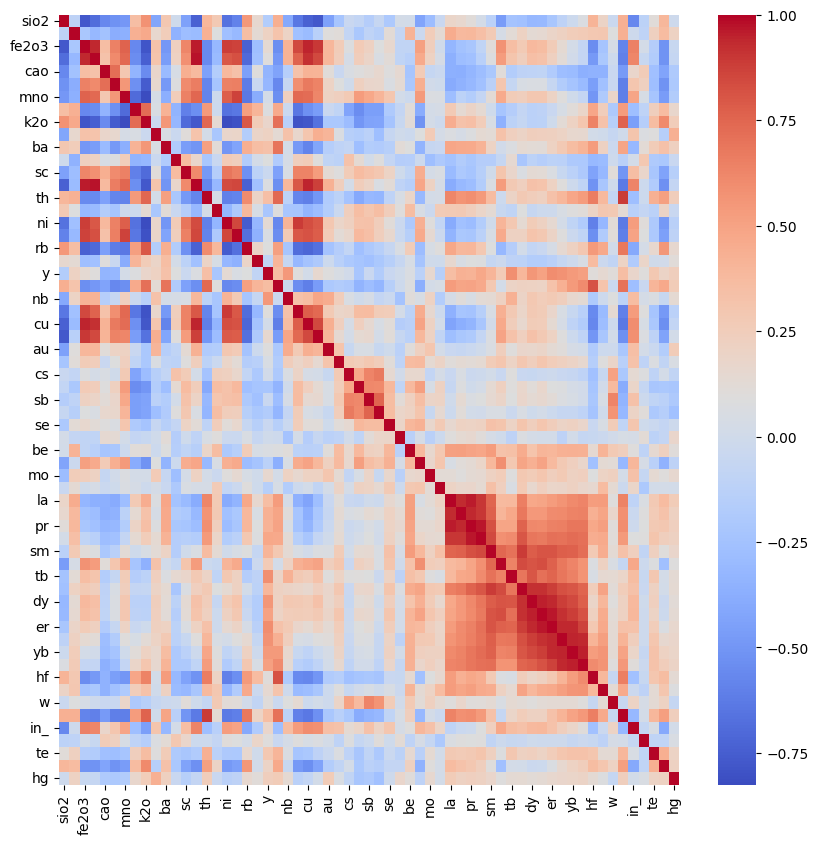

In [10]:
util.plt.figure(figsize=(10,10))
util.sns.heatmap(elem_df.corr(), 
                 annot=False, 
                 fmt=".2f", 
                 cmap='coolwarm')
util.plt.show()

# Feature Selection

## Split into train, validation and test data

In [11]:
train_df = elem_df.copy()
target = elem_df['zr']
train_df.drop(['zr'], axis=1, inplace=True)

In [12]:
X_train, X_test, y_train, y_test = util.train_test_split(train_df, 
                                                         target, 
                                                         test_size=0.1, 
                                                         random_state=42,
                                                         shuffle=True)

In [13]:
X_train, X_val, y_train, y_val = util.train_test_split(X_train, 
                                                       y_train, 
                                                       test_size=0.1, 
                                                       random_state=42, 
                                                       shuffle=True)

## Normalize

In [14]:
rs = util.RobustScaler()

norm_data = rs.fit_transform(X_train)

X_train_norm = util.pd.DataFrame(norm_data, 
                                 index=X_train.index, 
                                 columns=X_train.columns)

## Estimator: Random Forest

In [15]:
# rf = RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1)
rf = util.RandomForestRegressor()
rfecv_rf = util.rfecv(rf, X_train_norm, y_train, 1, 5)

In [16]:
print('Optimal number of features: {}'.format(rfecv_rf.n_features_))

Optimal number of features: 33


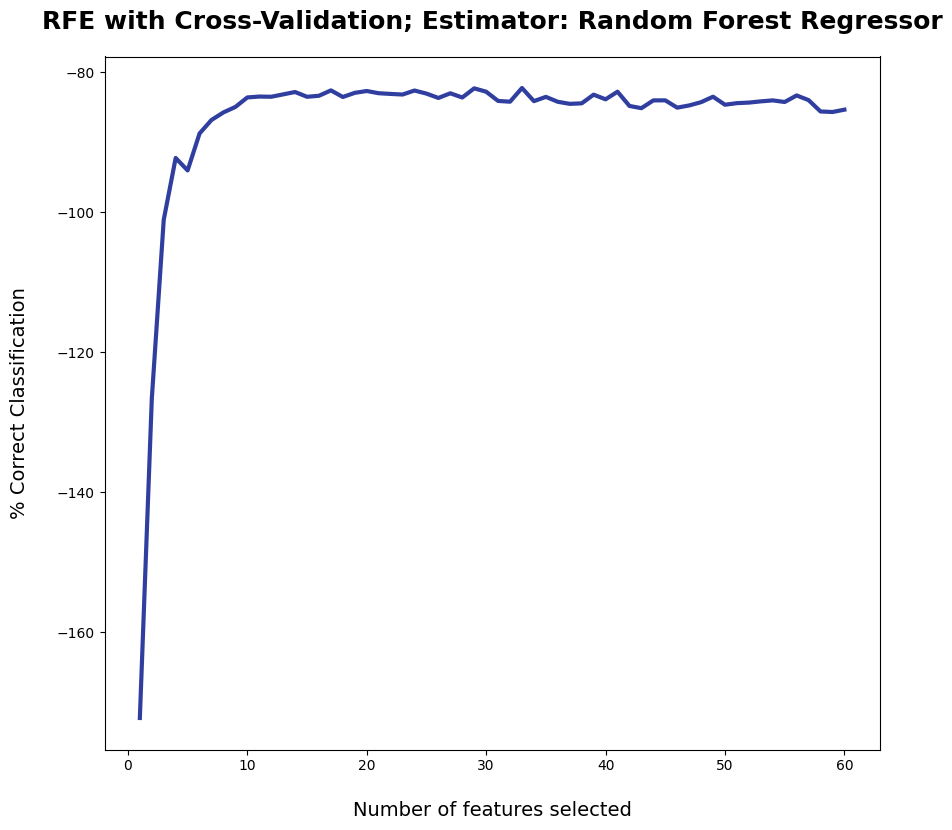

In [17]:
util.plot_pcc(rfecv_rf, 'RFE with Cross-Validation; Estimator: Random Forest Regressor')

In [18]:
X_rf = X_train_norm.drop(X_train_norm.columns[util.np.where(rfecv_rf.support_ == False)[0]], axis=1)

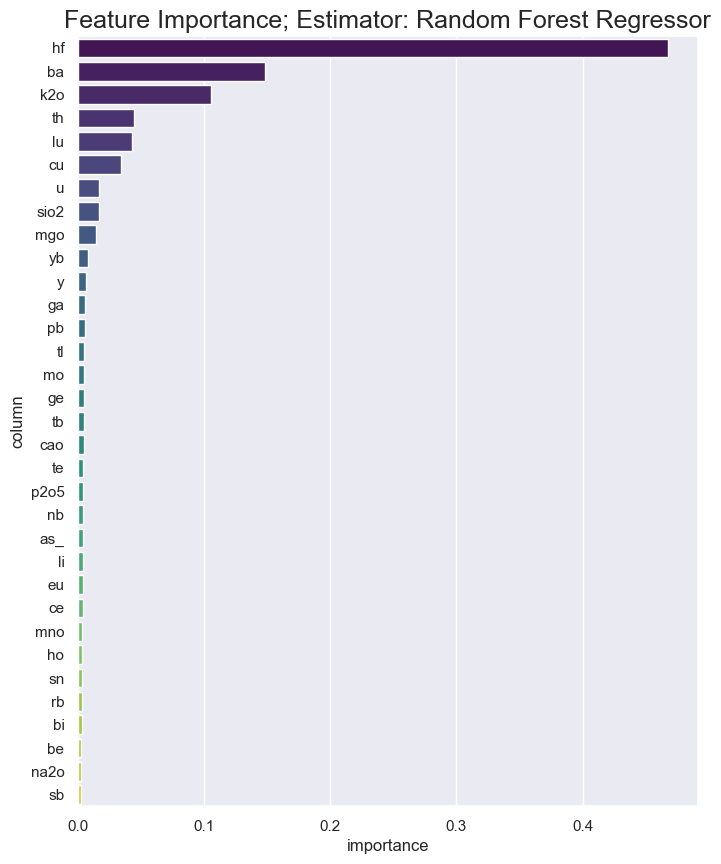

In [19]:
util.feature_importance(rfecv_rf, X_rf, 'Feature Importance; Estimator: Random Forest Regressor')

## Estimator: Gradient Boosting

In [60]:
gbr = util.GradientBoostingRegressor()
rfecv_bgr = util.rfecv(gbr, X_train_norm, y_train, 1, 5)

In [61]:
print('Optimal number of features: {}'.format(rfecv_bgr.n_features_))

Optimal number of features: 30


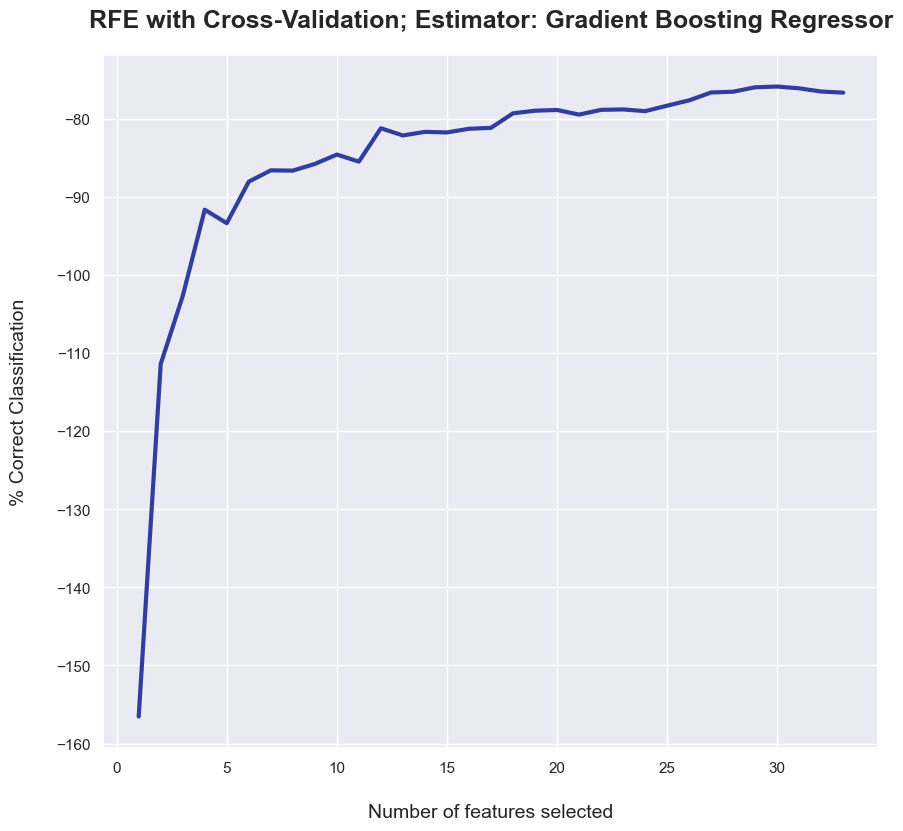

In [62]:
util.plot_pcc(rfecv_bgr, 'RFE with Cross-Validation; Estimator: Gradient Boosting Regressor')

In [63]:
X_gbr = X_train_norm.drop(X_train_norm.columns[util.np.where(rfecv_bgr.support_ == False)[0]], axis=1)

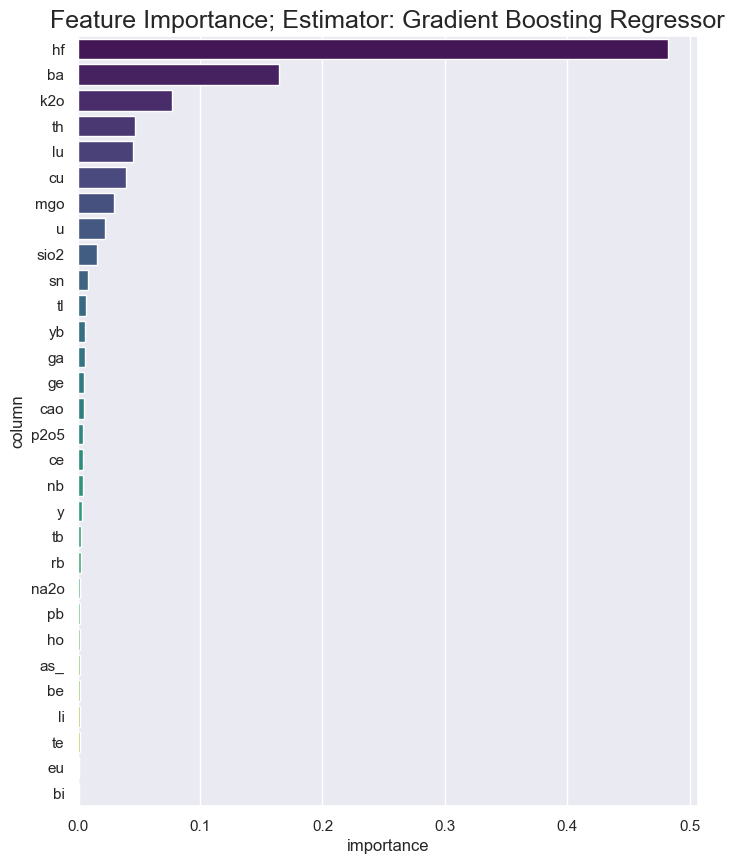

In [64]:
util.feature_importance(rfecv_bgr, X_gbr, 'Feature Importance; Estimator: Gradient Boosting Regressor')

# Model Training

In [40]:
train_df = elem_df[X_rf.columns]

In [65]:
train_df = elem_df[X_gbr.columns]

In [66]:
X_train, X_test, y_train, y_test = util.train_test_split(train_df, 
                                                         target, 
                                                         test_size=0.1, 
                                                         random_state=42,
                                                         shuffle=True)

In [67]:
X_train, X_val, y_train, y_val = util.train_test_split(X_train, 
                                                       y_train, 
                                                       test_size=0.1, 
                                                       random_state=42,
                                                       shuffle=True)

In [68]:
rs = util.RobustScaler()

norm_data = rs.fit_transform(X_train)

X_train_norm = util.pd.DataFrame(norm_data, 
                                 index=X_train.index, 
                                 columns=X_train.columns)

## Random Forest

- Estimator: Random Forest

In [44]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': [1, 2, 3, 4, 'sqrt'],   # Number of features to consider at every split
    'max_depth': [10, 20, 30],    # Maximum number of levels in each tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]              # Minimum number of samples required at each leaf node
}

rf = util.RandomForestRegressor()

grid_search_rfr_rf = util.GridSearchCV(rf, 
                                       param_grid, 
                                       cv=5, 
                                       scoring='neg_mean_absolute_error', 
                                       verbose=5, 
                                       n_jobs=-1)

grid_search_rfr_rf.fit(X_train_norm, y_train)

# Get the best hyperparameters
best_params = grid_search_rfr_rf.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


### Run the models on validation data

In [45]:
y_pred_val = util.pred_val(X_val, rs, grid_search_rfr_rf)

In [46]:
util.eval_model(y_val, y_pred_val, 'Validation set', X_train_norm.shape[0], X_train_norm.shape[1])

Validation set
Root Mean Squared Error: 105.99
Mean Absolute Error: 84.02
R-squared Error: 0.9
Adjusted R-squared Error: 0.89


### Run the model on test data

In [47]:
y_pred = util.pred_val(X_test, rs, grid_search_rfr_rf)

In [48]:
util.eval_model(y_test, y_pred, 'Test set', X_train_norm.shape[0], X_train_norm.shape[1])

Test set
Root Mean Squared Error: 108.05
Mean Absolute Error: 85.87
R-squared Error: 0.84
Adjusted R-squared Error: 0.83


### Learning Curve

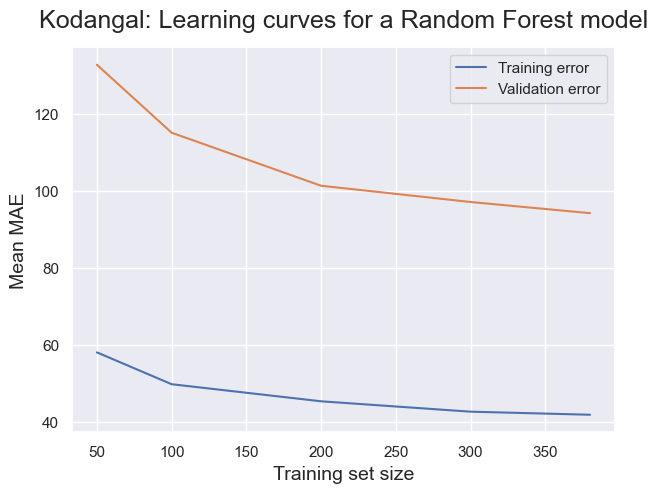

In [49]:
util.plot_learing_curve(util.RandomForestRegressor(max_depth=10, 
                                                   max_features='sqrt', 
                                                   min_samples_leaf=1, 
                                                   min_samples_split=5, 
                                                   n_estimators=200), 
                        X_train_norm, y_train, 5, 'Random Forest', 'Kodangal')

In [50]:
plot_vals = util.pd.DataFrame({
    'Identifier': y_test.index,
    'Actual': y_test,
    'Predicted': y_pred
})

plot_vals = plot_vals.sort_values(by='Identifier')

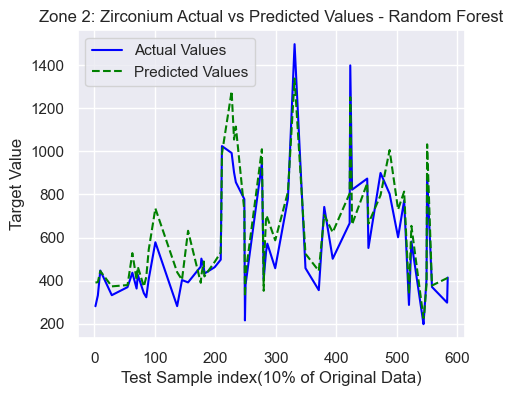

In [51]:
util.plt.figure(figsize=(5, 4))
util.plt.plot(plot_vals['Actual'], label='Actual Values', color='blue')
util.plt.plot(plot_vals['Predicted'], label='Predicted Values', color='green', linestyle='--')
util.plt.title('Zone 2: Zirconium Actual vs Predicted Values - Random Forest')
util.plt.xlabel('Test Sample index(10% of Original Data)')
util.plt.ylabel('Target Value')
util.plt.legend()
util.plt.grid(True)
util.plt.show()

- Estimator: Gradient Boosting

In [69]:
# param_grid = {
#     'n_estimators': [50, 100, 150, 200, 250],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [5, 10, 15],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': [1, 2, 3, 4, 'sqrt'],   # Number of features to consider at every split
    'max_depth': [10, 20, 30],    # Maximum number of levels in each tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]              # Minimum number of samples required at each leaf node
}

rf = util.RandomForestRegressor()

grid_search_rfr_gb = util.GridSearchCV(rf, 
                                       param_grid, 
                                       cv=5, 
                                       scoring='neg_mean_absolute_error', 
                                       verbose=5, 
                                       n_jobs=-1)

grid_search_rfr_gb.fit(X_train_norm, y_train)

# Get the best hyperparameters
best_params = grid_search_rfr_gb.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


### Run the models on validation data

In [70]:
y_pred_val = util.pred_val(X_val, rs, grid_search_rfr_gb)

In [71]:
util.eval_model(y_val, y_pred_val, 'Validation set', X_train_norm.shape[0], X_train_norm.shape[1])

Validation set
Root Mean Squared Error: 105.96
Mean Absolute Error: 82.99
R-squared Error: 0.9
Adjusted R-squared Error: 0.89


### Run the model on test data

In [72]:
y_pred = util.pred_val(X_test, rs, grid_search_rfr_gb)

In [73]:
util.eval_model(y_test, y_pred, 'Test set', X_train_norm.shape[0], X_train_norm.shape[1])

Test set
Root Mean Squared Error: 107.5
Mean Absolute Error: 85.91
R-squared Error: 0.84
Adjusted R-squared Error: 0.83


### Learning Curve

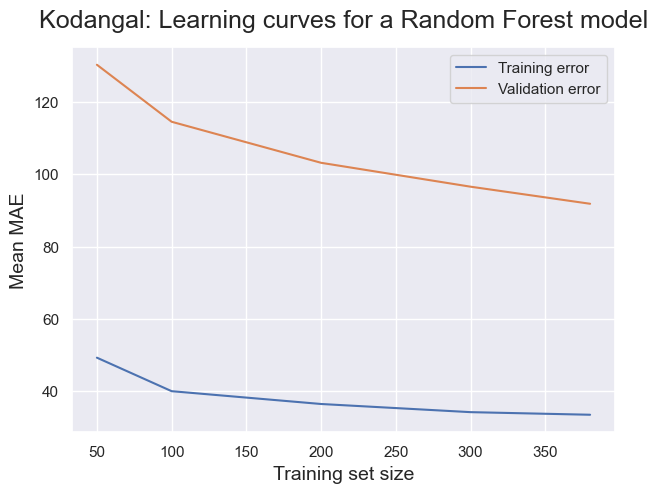

In [74]:
util.plot_learing_curve(util.RandomForestRegressor(max_depth=30, 
                                                   max_features='sqrt',  
                                                   min_samples_leaf=1,
                                                   min_samples_split=2, 
                                                   n_estimators=300), 
                        X_train_norm, y_train, 5, 'Random Forest', 'Kodangal')

In [75]:
plot_vals = util.pd.DataFrame({
    'Identifier': y_test.index,
    'Actual': y_test,
    'Predicted': y_pred
})

plot_vals = plot_vals.sort_values(by='Identifier')

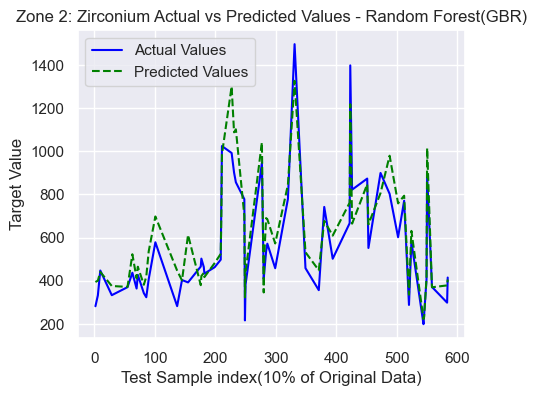

In [76]:
util.plt.figure(figsize=(5, 4))
util.plt.plot(plot_vals['Actual'], label='Actual Values', color='blue')
util.plt.plot(plot_vals['Predicted'], label='Predicted Values', color='green', linestyle='--')
util.plt.title('Zone 2: Zirconium Actual vs Predicted Values - Random Forest(GBR)')
util.plt.xlabel('Test Sample index(10% of Original Data)')
util.plt.ylabel('Target Value')
util.plt.legend()
util.plt.grid(True)
util.plt.show()

## XGBoost

- Estimator: Random Forest

In [52]:
param_grid = {
    'n_estimators': [100, 200, 300],    
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [3, 5, 7],          
    'colsample_bytree': [0.5, 0.7, 1.0], 
    'subsample': [0.5, 0.7, 1.0],        
    'gamma': [0.1, 0.2],             
    'reg_alpha': [0.5, 1],       
    'reg_lambda': [0.5, 1],           
    'objective': ['reg:squarederror']
}

xgb = util.xgboost.XGBRegressor()

grid_search_xgb_rf = util.GridSearchCV(xgb, 
                                       param_grid, 
                                       cv=5, 
                                       scoring='neg_mean_absolute_error', 
                                       verbose=5, 
                                       n_jobs=-1)

grid_search_xgb_rf.fit(X_train_norm, y_train)

# Get the best hyperparameters
best_params = grid_search_xgb_rf.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'objective': 'reg:squarederror', 'reg_alpha': 0.5, 'reg_lambda': 1, 'subsample': 0.7}


### Run the model on validation data

In [53]:
y_pred_val = util.pred_val(X_val, rs, grid_search_xgb_rf)

In [54]:
util.eval_model(y_val, y_pred_val, 'Validation set', X_train_norm.shape[0], X_train_norm.shape[1])

Validation set
Root Mean Squared Error: 83.79
Mean Absolute Error: 62.62
R-squared Error: 0.94
Adjusted R-squared Error: 0.93


### Run the model on test data

In [55]:
y_pred = util.pred_val(X_test, rs, grid_search_xgb_rf)

In [56]:
util.eval_model(y_test, y_pred, 'Test set', X_train_norm.shape[0], X_train_norm.shape[1])

Test set
Root Mean Squared Error: 125.94
Mean Absolute Error: 87.45
R-squared Error: 0.78
Adjusted R-squared Error: 0.77


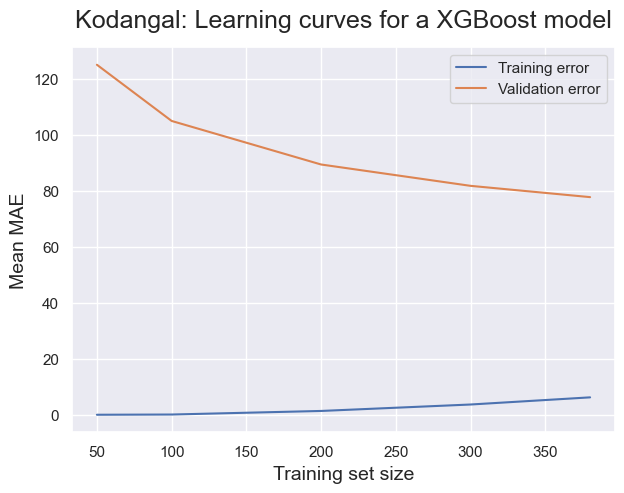

In [57]:
util.plot_learing_curve(util.xgboost.XGBRegressor(colsample_bytree=1, 
                                                  gamma=0.1, 
                                                  learning_rate=0.1, 
                                                  max_depth=3, 
                                                  n_estimators=300, 
                                                  objective='reg:squarederror', 
                                                  reg_alpha=0.5, 
                                                  reg_lambda=1, 
                                                  subsample=0.7), 
                        X_train_norm, y_train, 5, 'XGBoost', 'Kodangal')

In [58]:
plot_vals = util.pd.DataFrame({
    'Identifier': y_test.index,
    'Actual': y_test,
    'Predicted': y_pred
})

plot_vals = plot_vals.sort_values(by='Identifier')

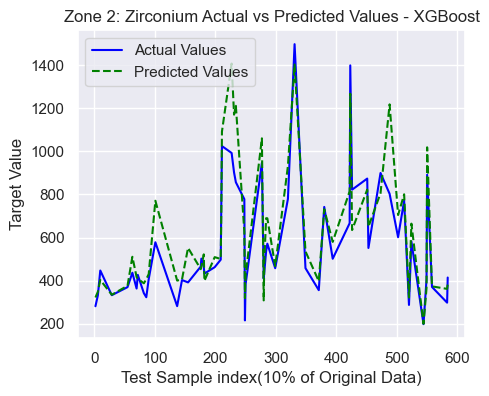

In [59]:
util.plt.figure(figsize=(5, 4))
util.plt.plot(plot_vals['Actual'], label='Actual Values', color='blue')
util.plt.plot(plot_vals['Predicted'], label='Predicted Values', color='green', linestyle='--')
util.plt.title('Zone 2: Zirconium Actual vs Predicted Values - XGBoost')
util.plt.xlabel('Test Sample index(10% of Original Data)')
util.plt.ylabel('Target Value')
util.plt.legend()
util.plt.grid(True)
util.plt.show()

- Estimator: Gradient Boosting

In [77]:
param_grid = {
    'n_estimators': [100, 200, 300],    
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [3, 5, 7],          
    'colsample_bytree': [0.5, 0.7, 1.0], 
    'subsample': [0.5, 0.7, 1.0],        
    'gamma': [0.1, 0.2],             
    'reg_alpha': [0.5, 1],       
    'reg_lambda': [0.5, 1],           
    'objective': ['reg:squarederror']
}

xgb = util.xgboost.XGBRegressor()

grid_search_xgb_gb = util.GridSearchCV(xgb, 
                                       param_grid, 
                                       cv=5, 
                                       scoring='neg_mean_absolute_error', 
                                       verbose=5, 
                                       n_jobs=-1)

grid_search_xgb_gb.fit(X_train_norm, y_train)

# Get the best hyperparameters
best_params = grid_search_xgb_gb.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Best Hyperparameters: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'objective': 'reg:squarederror', 'reg_alpha': 1, 'reg_lambda': 0.5, 'subsample': 0.5}


### Run the model on validation data

In [78]:
y_pred_val = util.pred_val(X_val, rs, grid_search_xgb_gb)

In [79]:
util.eval_model(y_val, y_pred_val, 'Validation set', X_train_norm.shape[0], X_train_norm.shape[1])

Validation set
Root Mean Squared Error: 93.13
Mean Absolute Error: 69.25
R-squared Error: 0.92
Adjusted R-squared Error: 0.92


### Run the model on test data

In [80]:
y_pred = util.pred_val(X_test, rs, grid_search_xgb_gb)

In [81]:
util.eval_model(y_test, y_pred, 'Test set', X_train_norm.shape[0], X_train_norm.shape[1])

Test set
Root Mean Squared Error: 111.9
Mean Absolute Error: 76.98
R-squared Error: 0.83
Adjusted R-squared Error: 0.82


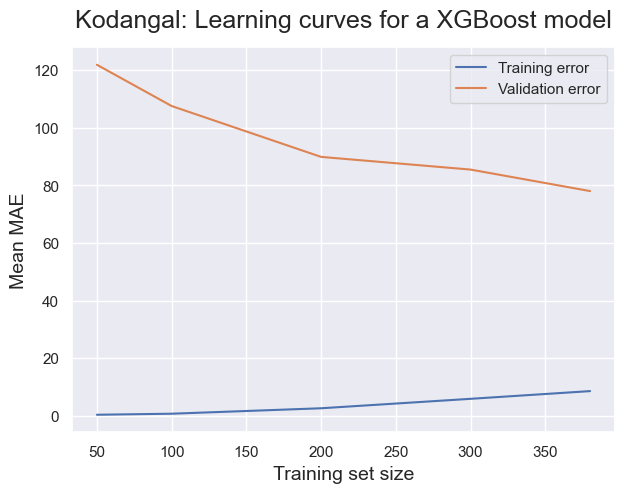

In [85]:
util.plot_learing_curve(util.xgboost.XGBRegressor(colsample_bytree=0.7, 
                                                  gamma=0.1, 
                                                  learning_rate=0.1, 
                                                  max_depth=3, 
                                                  n_estimators=300, 
                                                  objective='reg:squarederror', 
                                                  reg_alpha=1, 
                                                  reg_lambda=0.5, 
                                                  subsample=0.5), 
                         X_train_norm, y_train, 5, 'XGBoost', 'Kodangal')

In [86]:
plot_vals = util.pd.DataFrame({
    'Identifier': y_test.index,
    'Actual': y_test,
    'Predicted': y_pred
})

plot_vals = plot_vals.sort_values(by='Identifier')

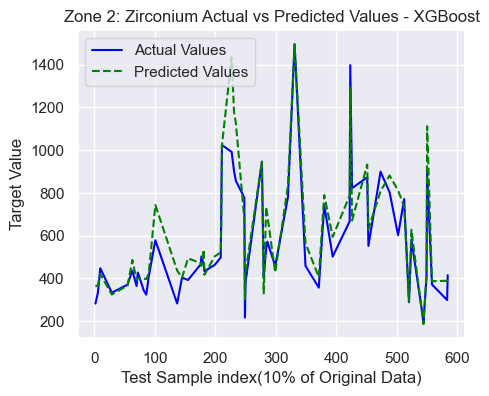

In [87]:
util.plt.figure(figsize=(5, 4))
util.plt.plot(plot_vals['Actual'], label='Actual Values', color='blue')
util.plt.plot(plot_vals['Predicted'], label='Predicted Values', color='green', linestyle='--')
util.plt.title('Zone 2: Zirconium Actual vs Predicted Values - XGBoost')
util.plt.xlabel('Test Sample index(10% of Original Data)')
util.plt.ylabel('Target Value')
util.plt.legend()
util.plt.grid(True)
util.plt.show()

# Saving the models

- ML models

In [89]:
model_path = (util.os.path.join(curr_dir, 'Models/Kodangal/')).replace('\\', '/')

In [91]:
# Random Forest with RF estimator
with open(model_path + 'RFR_RF_zr.pkl', 'wb') as file:
    util.pkl.dump(grid_search_rfr_rf, file)

# Random Forest with GB estimator
# with open(model_path + 'RFR_GB.pkl', 'wb') as file:
#     pkl.dump(grid_search_rfr_gb, file)

# XGBoost with RF estimator
# with open(model_path + 'XGB_RF_zr.pkl', 'wb') as file:
#     pkl.dump(grid_search_xgb_rf, file)

# # XGBoost with GB estimator
# with open(model_path + 'XGB_GB.pkl', 'wb') as file:
#     pkl.dump(grid_search_xgb_rf, file)

- RobustScaler

In [92]:
with open(model_path + 'rs_norm_zr.pkl', 'wb') as file:
    util.pkl.dump(rs, file)

In [93]:
X_train_norm_df = util.pd.DataFrame(X_train_norm.columns, columns=['Elements'])
with util.pd.ExcelWriter(data_path + '/Kodangal dataset/Kodangal_element_names.xlsx', engine='openpyxl', mode='a') as writer:
    X_train_norm_df.to_excel(writer, sheet_name='Zirconium', index=False)

# Test the models

In [78]:
y_test

107    1.0
591    0.0
81     1.0
323    4.0
904    4.0
      ... 
506    1.0
319    1.0
260    1.0
958    5.0
722    0.0
Name: au, Length: 118, dtype: float64

In [116]:
new_obsrv = elem_df[elem_df.index == 81].drop('au', axis=1)
new_obsrv

,sio2,al2o3,fe2o3,tio2,cao,mgo,na2o,k2o,ba,ga,...,er,tm,yb,lu,hf,ta,w,u,f,hg
81,60.19,13.11,7.08,1.45,3.29,1.69,0.25,0.77,521.0,18.0,...,3.311743,0.538243,3.366489,0.548267,16.483437,1.273944,1.377158,2.205044,124.0,10.0


In [117]:
y_pred = pred_val(new_obsrv, list(X_gbr.columns), sc, grid_search_rfr_gb)
y_pred

array([1.59629048])